<a href="https://colab.research.google.com/github/aditinirwan/JokesAnalyzer/blob/main/JokesAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ------------**TASK 1**---------------

# Data Cleaning

## Problem Statement

Look at transcripts of various comedians and note their similarities and differences and find if the stand up comedian of your choice has comedy style different than other comedian.


## Getting The Data

In [ ]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="ast-container").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/comedy/mike-epps-under-rated-never-faded-x-rated-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-monologue-snl-2022-transcript/',
        'https://scrapsfromtheloft.com/comedy/iliza-shlesinger-hot-forever-transcript/',
        'https://scrapsfromtheloft.com/comedy/gabriel-iglesias-stadium-fluffy-transcript/',
        'https://scrapsfromtheloft.com/comedy/fortune-feimster-good-fortune-transcript/',
        'https://scrapsfromtheloft.com/comedy/deon-cole-charleens-boy-transcript/',
        'https://scrapsfromtheloft.com/comedy/neal-brennan-blocks-transcript/',
        'https://scrapsfromtheloft.com/comedy/trevor-noah-i-wish-you-would-transcript/',
        'https://scrapsfromtheloft.com/comedy/whitney-cummings-jokes-transcript/',
        'https://scrapsfromtheloft.com/comedy/kate-berlant-cinnamon-in-the-wind-transcript/',
        'https://scrapsfromtheloft.com/comedy/patton-oswalt-we-all-scream-transcript/',
        'https://scrapsfromtheloft.com/comedy/bill-burr-live-at-red-rocks-transcript/']

# Comedian names
comedians = ['mike', 'dave', 'iliza', 'gabriel', 'fortune', 'deon', 'neal', 'trevor', 'whitney', 'kate', 'patton', 'bill']

In [ ]:
# # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/comedy/mike-epps-under-rated-never-faded-x-rated-transcript/
https://scrapsfromtheloft.com/comedy/dave-chappelle-monologue-snl-2022-transcript/
https://scrapsfromtheloft.com/comedy/iliza-shlesinger-hot-forever-transcript/
https://scrapsfromtheloft.com/comedy/gabriel-iglesias-stadium-fluffy-transcript/
https://scrapsfromtheloft.com/comedy/fortune-feimster-good-fortune-transcript/
https://scrapsfromtheloft.com/comedy/deon-cole-charleens-boy-transcript/
https://scrapsfromtheloft.com/comedy/neal-brennan-blocks-transcript/
https://scrapsfromtheloft.com/comedy/trevor-noah-i-wish-you-would-transcript/
https://scrapsfromtheloft.com/comedy/whitney-cummings-jokes-transcript/
https://scrapsfromtheloft.com/comedy/kate-berlant-cinnamon-in-the-wind-transcript/
https://scrapsfromtheloft.com/comedy/patton-oswalt-we-all-scream-transcript/
https://scrapsfromtheloft.com/comedy/bill-burr-live-at-red-rocks-transcript/


In [ ]:
# Pickle files for later use

# Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [ ]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['mike', 'dave', 'iliza', 'gabriel', 'fortune', 'deon', 'neal', 'trevor', 'whitney', 'kate', 'patton', 'bill'])

In [ ]:
# More checks
data['dave'][:2]

['Original air date: November 12, 2022', '* * *']

## Cleaning The Data

In [ ]:
# Let's take a look at our data again
next(iter(data.keys()))

'mike'

In [ ]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
next(iter(data.values()))

['[Cheers and applause]',
 'Hoo! Hoo! Hoo!',
 'Hoo! Hoo! Hoo!',
 'Hoo!',
 '[Cheers and applause intensify]',
 'Hoo! Hoo!',
 'Hoo! Hoo!',
 'Hoo! Hoo! Hoo! Hoo! Hoo!',
 '[Beatboxing]',
 '[music plays]',
 'If you’re born and raised in the “d,” make some noise! And give it up, from hollywood to the hood, for my brother — Mike Epps!',
 '[Drum beat playing]',
 'Let’s go!',
 'All right! All right!',
 'Cabbage! Cabbage patch!',
 'Papa “c”! Papa “c”! Papa “c”!',
 'Reebok!',
 'I’m f*cking it up. I’m f*cking it up.',
 'Stinky legs!',
 'Stinky legs!',
 'Stinky legs! Stinky legs!',
 'Stinky legs! Stinky legs!',
 'Stinky legs!',
 'Doug e. Fresh, y’all! Doug E. Fresh!',
 '[Cheers and applause]',
 'Big “D”!',
 'Doug E. Fresh!',
 'Detroit, what’s up?!',
 '[Cheers and applause]',
 'Sit on down! Sit on down!',
 'That n*gga Doug E. Fresh spit all over my f*cking forehead.',
 '[Beatboxing]',
 'Doddamn, Doug e.',
 'One more time for Doug E. Fresh, y’all -legendary.',
 '[Cheers and applause]',
 'That’s legen

In [ ]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [ ]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
bill,"[audience cheering, whistling] [emcee] Ladies and gentlemen, Bill Burr! [cheering and applause] All right, thank you! Thank you very much. Thank y..."
dave,"Original air date: November 12, 2022 * * * Ladies and gentlemen, Dave Chappelle. [Cheers and applause] ♪♪ ♪♪ ♪♪ Thank you. Thank you very much for..."
deon,"[indistinct chattering] [woman] Oh, this water is so good. I don’t know why I was so thirsty. But anyway, I feel comfortable now. It feels real go..."
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don...
gabriel,[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus yea...
iliza,"[upbeat music playing] [crowd cheering] Cleveland, Ohio! Thank you! Thank you so much. This is so great. This is so nice to be here with you in pu..."
kate,"Whoa! Okay, yeah. Good. Okay, don’t embarrass yourself, okay. Ohh, the expectations. Crushing, I would argue. Absolutely crushing, debilitating in..."
mike,[Cheers and applause] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Cheers and applause intensify] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Beatboxing]...
neal,"[gentle music playing] [audience applauding] [audience cheering] All right, let me explain. Friend of mine… “Former friend,” we’ll call her. [audi..."
patton,[“Hard to Kill” by Bleached plays] [audience cheering and applauding] Hello! Denver! [cheering and applause continues] [Patton laughs] Oh my God! ...


In [ ]:
# Let's take a look at the transcript for Neal
data_df.transcript.loc['neal']

"[gentle music playing] [audience applauding] [audience cheering] All right, let me explain. Friend of mine… “Former friend,” we’ll call her. [audience laughter] …is an artist, right? And the theme of our friendship is kind of feeling alone in the world. Right? So I wrote this show, which is about that feeling. And I sent her the script and I was like, “Hey, can you make a backdrop for me?” She’s like, “I got you.” And then two days ago, she sends me this. [audience laughter] Which feels less like alienation and more like a second grade speech therapist’s office. [audience laughter] I’m like, “How am I supposed to arrange these things?” She’s like, “Oh, you’ll figure it out.” [audience laughter] So, I’m going to be talking to you guys… all night, but, I’m going to be preoccupied with trying to satisfy her. None of this should surprise me. Is your life going smoothly? [audience laughter] Are you just floating from event to event, feeling good about yourself? ‘Cause I’m not. Most interac

In [ ]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
bill,ladies and gentlemen bill burr all right thank you thank you very much thank you thank you thank you how are ya how’s it goin’ all right you gu...
dave,original air date november ladies and gentlemen dave chappelle ♪♪ ♪♪ ♪♪ thank you thank you very much for being here before i start tonight ...
deon,oh this water is so good i don’t know why i was so thirsty but anyway i feel comfortable now it feels real good in here yeah it’s so good to see...
fortune,please welcome fortune feimster ♪ i’m a powerful woman ♪ ♪ always get what i want ♪ ♪ so don’t you get in my way now that’s not what i want ♪ ♪...
gabriel,can you please state your name martin moreno but you might know me as… martinnnnn i’ve been touring with gabriel iglesias for years martinnnnn a...
iliza,cleveland ohio thank you thank you so much this is so great this is so nice to be here with you in public we’re not stuck at home doing this for...
kate,whoa okay yeah good okay don’t embarrass yourself okay ohh the expectations crushing i would argue absolutely crushing debilitating in every way i...
mike,hoo hoo hoo hoo hoo hoo hoo hoo hoo hoo hoo hoo hoo hoo hoo hoo if you’re born and raised in the “d” make some noise and give it up from holly...
neal,all right let me explain friend of mine… “former friend” we’ll call her …is an artist right and the theme of our friendship is kind of feeling...
patton,hello denver oh my god hello thank you thank you thank you thank you oh my god yes thank you all so much for coming out tonight um… hey i bro...


In [ ]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…*]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
bill,ladies and gentlemen bill burr all right thank you thank you very much thank you thank you thank you how are ya hows it goin all right you guys...
dave,original air date november ladies and gentlemen dave chappelle ♪♪ ♪♪ ♪♪ thank you thank you very much for being here before i start tonight ...
deon,oh this water is so good i dont know why i was so thirsty but anyway i feel comfortable now it feels real good in here yeah its so good to see y...
fortune,please welcome fortune feimster ♪ im a powerful woman ♪ ♪ always get what i want ♪ ♪ so dont you get in my way now thats not what i want ♪ ♪ ca...
gabriel,can you please state your name martin moreno but you might know me as martinnnnn ive been touring with gabriel iglesias for years martinnnnn and...
iliza,cleveland ohio thank you thank you so much this is so great this is so nice to be here with you in public were not stuck at home doing this for ...
kate,whoa okay yeah good okay dont embarrass yourself okay ohh the expectations crushing i would argue absolutely crushing debilitating in every way im...
mike,hoo hoo hoo hoo hoo hoo hoo hoo hoo hoo hoo hoo hoo hoo hoo hoo if youre born and raised in the d make some noise and give it up from hollywoo...
neal,all right let me explain friend of mine former friend well call her is an artist right and the theme of our friendship is kind of feeling alon...
patton,hello denver oh my god hello thank you thank you thank you thank you oh my god yes thank you all so much for coming out tonight um hey i brok...


In [ ]:
def clean_text_round3(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('thank you', '', text)
    text = re.sub('hoo', '', text)
    text = re.sub('♪', '', text)
    return text

round3 = lambda x: clean_text_round3(x)

In [ ]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round3))
data_clean

,transcript
bill,ladies and gentlemen bill burr all right very much how are ya hows it goin all right you guys standin up sit down sit down see if im funny...
dave,original air date november ladies and gentlemen dave chappelle very much for being here before i start tonight i just wanted to read a ...
deon,oh this water is so good i dont know why i was so thirsty but anyway i feel comfortable now it feels real good in here yeah its so good to see y...
fortune,please welcome fortune feimster im a powerful woman always get what i want so dont you get in my way now thats not what i want cause im ...
gabriel,can you please state your name martin moreno but you might know me as martinnnnn ive been touring with gabriel iglesias for years martinnnnn and...
iliza,cleveland ohio so much this is so great this is so nice to be here with you in public were not stuck at home doing this for ten likes ah thats...
kate,whoa okay yeah good okay dont embarrass yourself okay ohh the expectations crushing i would argue absolutely crushing debilitating in every way im...
mike,if youre born and raised in the d make some noise and give it up from hollywood to the d for my brother — mike epps lets go a...
neal,all right let me explain friend of mine former friend well call her is an artist right and the theme of our friendship is kind of feeling alon...
patton,hello denver oh my god hello oh my god yes all so much for coming out tonight um hey i broke my foot yeah thats how i started my year i ...


## Organizing The Data

### Assignment:
1. Organized data in two standard text formats:
   a) Corpus - corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.
   b) Document-Term Matrix - word counts in matrix format

### Corpus: Example

A corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [ ]:
# Let's take a look at our dataframe
data_df

,transcript
bill,"[audience cheering, whistling] [emcee] Ladies and gentlemen, Bill Burr! [cheering and applause] All right, thank you! Thank you very much. Thank y..."
dave,"Original air date: November 12, 2022 * * * Ladies and gentlemen, Dave Chappelle. [Cheers and applause] ♪♪ ♪♪ ♪♪ Thank you. Thank you very much for..."
deon,"[indistinct chattering] [woman] Oh, this water is so good. I don’t know why I was so thirsty. But anyway, I feel comfortable now. It feels real go..."
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don...
gabriel,[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus yea...
iliza,"[upbeat music playing] [crowd cheering] Cleveland, Ohio! Thank you! Thank you so much. This is so great. This is so nice to be here with you in pu..."
kate,"Whoa! Okay, yeah. Good. Okay, don’t embarrass yourself, okay. Ohh, the expectations. Crushing, I would argue. Absolutely crushing, debilitating in..."
mike,[Cheers and applause] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Cheers and applause intensify] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Beatboxing]...
neal,"[gentle music playing] [audience applauding] [audience cheering] All right, let me explain. Friend of mine… “Former friend,” we’ll call her. [audi..."
patton,[“Hard to Kill” by Bleached plays] [audience cheering and applauding] Hello! Denver! [cheering and applause continues] [Patton laughs] Oh my God! ...


In [ ]:
# Let's add the comedians' full names as well
full_names = ['Bill Burr','Dave Chappelle','Deon Cole','Fortune Feimster', 'Gabriel Iglesias', 'Iliza Shlesinger', 
              'Kate Berlant', 'Mike Epps', 'Neal Brennan', 'Patton Oswalt','Trevor Noah', 'Whitney Cummings' ]

data_df['full_name'] = full_names
data_df

,transcript,full_name
bill,"[audience cheering, whistling] [emcee] Ladies and gentlemen, Bill Burr! [cheering and applause] All right, thank you! Thank you very much. Thank y...",Bill Burr
dave,"Original air date: November 12, 2022 * * * Ladies and gentlemen, Dave Chappelle. [Cheers and applause] ♪♪ ♪♪ ♪♪ Thank you. Thank you very much for...",Dave Chappelle
deon,"[indistinct chattering] [woman] Oh, this water is so good. I don’t know why I was so thirsty. But anyway, I feel comfortable now. It feels real go...",Deon Cole
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don...,Fortune Feimster
gabriel,[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus yea...,Gabriel Iglesias
iliza,"[upbeat music playing] [crowd cheering] Cleveland, Ohio! Thank you! Thank you so much. This is so great. This is so nice to be here with you in pu...",Iliza Shlesinger
kate,"Whoa! Okay, yeah. Good. Okay, don’t embarrass yourself, okay. Ohh, the expectations. Crushing, I would argue. Absolutely crushing, debilitating in...",Kate Berlant
mike,[Cheers and applause] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Cheers and applause intensify] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Beatboxing]...,Mike Epps
neal,"[gentle music playing] [audience applauding] [audience cheering] All right, let me explain. Friend of mine… “Former friend,” we’ll call her. [audi...",Neal Brennan
patton,[“Hard to Kill” by Bleached plays] [audience cheering and applauding] Hello! Denver! [cheering and applause continues] [Patton laughs] Oh my God! ...,Patton Oswalt


In [ ]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

### Document-Term Matrix: Example

For many of the techniques we'll be using in future assignment, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's ` CountVectorizer `, where every row will represent a different document and every column will represent a different word.

In addition, with ` CountVectorizer `, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaaaah,aaaaaah,aaah,aah,aarp,abandon,abandoned,abc,abercrombie,ability,...,zip,zippers,zoned,zones,zoom,zoomed,zsh,álvarez,ándale,ñañaras
bill,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,2,0,0,0,0,0
dave,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
deon,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
fortune,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
gabriel,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,4,0,0,3,1,1
iliza,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,2,0,0,0,0,0
kate,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mike,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neal,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
patton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0


In [ ]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [ ]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# ------------**TASK 2**---------------

# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [ ]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()


,bill,dave,deon,fortune,gabriel,iliza,kate,mike,neal,patton,trevor,whitney
aaaaaaah,0,0,0,0,0,0,0,1,0,0,0,0
aaaaaah,0,0,0,0,0,0,0,0,0,0,0,1
aaah,0,0,0,0,1,0,0,0,0,0,0,1
aah,0,1,0,0,0,0,1,1,3,0,0,0
aarp,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'bill': [('like', 235),
  ('just', 163),
  ('know', 157),
  ('right', 154),
  ('fuckin', 141),
  ('im', 123),
  ('dont', 96),
  ('youre', 83),
  ('gonna', 67),
  ('shit', 63),
  ('yeah', 55),
  ('people', 54),
  ('fuck', 47),
  ('thats', 46),
  ('did', 42),
  ('got', 40),
  ('oh', 37),
  ('time', 36),
  ('going', 33),
  ('little', 31),
  ('theyre', 31),
  ('thing', 29),
  ('cause', 29),
  ('great', 29),
  ('women', 29),
  ('shes', 28),
  ('gotta', 27),
  ('okay', 27),
  ('look', 27),
  ('didnt', 25)],
 'dave': [('like', 30),
  ('said', 19),
  ('hes', 14),
  ('just', 14),
  ('know', 12),
  ('im', 11),
  ('theyre', 9),
  ('got', 8),
  ('dont', 8),
  ('people', 8),
  ('black', 7),
  ('seen', 7),
  ('kanye', 7),
  ('ha', 6),
  ('say', 6),
  ('house', 6),
  ('want', 6),
  ('good', 6),
  ('man', 6),
  ('mean', 6),
  ('started', 5),
  ('right', 5),
  ('honest', 5),
  ('jewish', 5),
  ('jews', 5),
  ('went', 5),
  ('going', 5),
  ('lot', 5),
  ('mad', 4),
  ('time', 4)],
 'deon': [('shit', 12

In [ ]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

bill
like, just, know, right, fuckin, im, dont, youre, gonna, shit, yeah, people, fuck, thats
---
dave
like, said, hes, just, know, im, theyre, got, dont, people, black, seen, kanye, ha
---
deon
shit, like, know, dont, motherfucker, ngga, aint, im, bitch, fuck, yall, got, just, gotta
---
fortune
like, im, just, got, said, dont, know, good, did, jax, oh, right, thats, uh
---
gabriel
like, im, know, said, just, dont, youre, thats, right, going, got, okay, oh, hes
---
iliza
like, dont, just, im, know, okay, youre, want, thats, women, girl, right, got, shes
---
kate
like, im, know, yeah, right, okay, just, oh, thats, dont, um, actually, really, want
---
mike
like, know, ngga, got, im, man, right, dont, shit, just, look, come, thats, aint
---
neal
like, know, im, right, dont, just, people, yeah, youre, going, got, think, cause, women
---
patton
im, like, oh, thats, know, gonna, right, youre, dont, just, fuck, yeah, got, theres
---
trevor
like, know, just, people, dont, right, day, im, india

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



What is counter? 

The counter is a sub-class available inside the dictionary class. The counter is a sub-class available inside the dictionary class. Using the Python Counter tool, you can count the key-value pairs in an object, also called a hash table object.

In [ ]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'just',
 'know',
 'right',
 'fuckin',
 'im',
 'dont',
 'youre',
 'gonna',
 'shit',
 'yeah',
 'people',
 'fuck',
 'thats',
 'did',
 'got',
 'oh',
 'time',
 'going',
 'little',
 'theyre',
 'thing',
 'cause',
 'great',
 'women',
 'shes',
 'gotta',
 'okay',
 'look',
 'didnt',
 'like',
 'said',
 'hes',
 'just',
 'know',
 'im',
 'theyre',
 'got',
 'dont',
 'people',
 'black',
 'seen',
 'kanye',
 'ha',
 'say',
 'house',
 'want',
 'good',
 'man',
 'mean',
 'started',
 'right',
 'honest',
 'jewish',
 'jews',
 'went',
 'going',
 'lot',
 'mad',
 'time',
 'shit',
 'like',
 'know',
 'dont',
 'motherfucker',
 'ngga',
 'aint',
 'im',
 'bitch',
 'fuck',
 'yall',
 'got',
 'just',
 'gotta',
 'man',
 'yeah',
 'women',
 'right',
 'ass',
 'thats',
 'old',
 'gonna',
 'come',
 'time',
 'goddamn',
 'ill',
 'going',
 'nggas',
 'ha',
 'let',
 'like',
 'im',
 'just',
 'got',
 'said',
 'dont',
 'know',
 'good',
 'did',
 'jax',
 'oh',
 'right',
 'thats',
 'uh',
 'look',
 'think',
 'want',
 'cause',
 'goi

In [ ]:
Counter(words)

Counter({'like': 12,
         'just': 12,
         'know': 12,
         'right': 12,
         'fuckin': 1,
         'im': 12,
         'dont': 12,
         'youre': 8,
         'gonna': 10,
         'shit': 4,
         'yeah': 10,
         'people': 8,
         'fuck': 3,
         'thats': 11,
         'did': 6,
         'got': 11,
         'oh': 7,
         'time': 6,
         'going': 8,
         'little': 5,
         'theyre': 5,
         'thing': 4,
         'cause': 6,
         'great': 1,
         'women': 4,
         'shes': 3,
         'gotta': 2,
         'okay': 7,
         'look': 5,
         'didnt': 3,
         'said': 4,
         'hes': 6,
         'black': 1,
         'seen': 1,
         'kanye': 1,
         'ha': 2,
         'say': 5,
         'house': 2,
         'want': 6,
         'good': 6,
         'man': 5,
         'mean': 1,
         'started': 1,
         'honest': 1,
         'jewish': 1,
         'jews': 1,
         'went': 2,
         'lot': 2,
         'mad

In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('just', 12),
 ('know', 12),
 ('right', 12),
 ('im', 12),
 ('dont', 12),
 ('thats', 11),
 ('got', 11),
 ('gonna', 10),
 ('yeah', 10),
 ('youre', 8),
 ('people', 8),
 ('going', 8),
 ('oh', 7),
 ('okay', 7),
 ('think', 7),
 ('did', 6),
 ('time', 6),
 ('cause', 6),
 ('hes', 6),
 ('want', 6),
 ('good', 6),
 ('little', 5),
 ('theyre', 5),
 ('look', 5),
 ('say', 5),
 ('man', 5),
 ('shit', 4),
 ('thing', 4),
 ('women', 4),
 ('said', 4),
 ('uh', 4),
 ('feel', 4),
 ('fuck', 3),
 ('shes', 3),
 ('didnt', 3),
 ('ill', 3),
 ('guys', 3),
 ('theres', 3),
 ('life', 3),
 ('day', 3),
 ('gotta', 2),
 ('ha', 2),
 ('house', 2),
 ('went', 2),
 ('lot', 2),
 ('ngga', 2),
 ('aint', 2),
 ('yall', 2),
 ('old', 2),
 ('come', 2),
 ('nggas', 2),
 ('need', 2),
 ('um', 2),
 ('way', 2),
 ('baby', 2),
 ('ive', 2),
 ('guy', 2),
 ('fuckin', 1),
 ('great', 1),
 ('black', 1),
 ('seen', 1),
 ('kanye', 1),
 ('mean', 1),
 ('started', 1),
 ('honest', 1),
 ('jewish', 1),
 ('jews', 1),
 ('mad', 1),
 ('motherfucke

In [ ]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'just',
 'know',
 'right',
 'im',
 'dont',
 'thats',
 'got',
 'gonna',
 'yeah',
 'youre',
 'people',
 'going',
 'oh',
 'okay',
 'think']

In [ ]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

data_stop

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaaaah,aaaaaah,aaah,aah,aarp,abandon,abandoned,abc,abercrombie,ability,...,zip,zippers,zoned,zones,zoom,zoomed,zsh,álvarez,ándale,ñañaras
bill,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,2,0,0,0,0,0
dave,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
deon,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
fortune,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
gabriel,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,4,0,0,3,1,1
iliza,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,2,0,0,0,0,0
kate,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mike,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neal,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
patton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0


In [ ]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

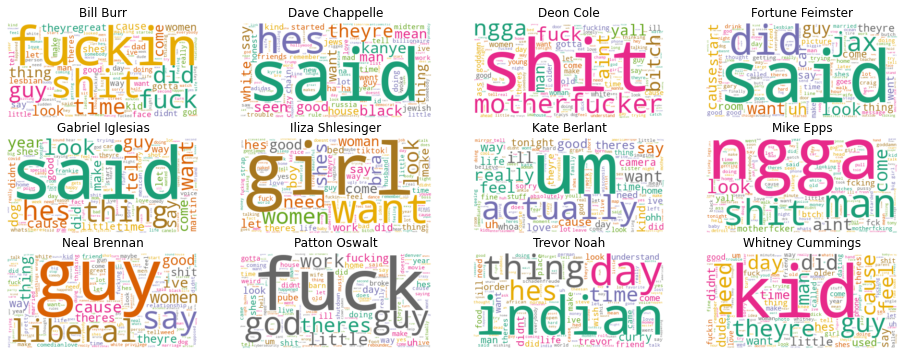

In [ ]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Bill Burr','Dave Chappelle','Deon Cole','Fortune Feimster', 'Gabriel Iglesias', 'Iliza Shlesinger', 
              'Kate Berlant', 'Mike Epps', 'Neal Brennan', 'Patton Oswalt','Trevor Noah', 'Whitney Cummings' ]

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.



*   Iliza talks a lot about women and their wants. 
*   A lot of people use the F-word. 



## Number of Words

### Analysis

In [ ]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Dave Chappelle,520
7,Mike Epps,894
2,Deon Cole,1059
6,Kate Berlant,1079
10,Trevor Noah,1279
11,Whitney Cummings,1375
3,Fortune Feimster,1386
9,Patton Oswalt,1431
8,Neal Brennan,1440
0,Bill Burr,1622


In [ ]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Dave Chappelle,520,915,59,15.508475
6,Kate Berlant,1079,2905,77,37.727273
2,Deon Cole,1059,3367,80,42.087500
7,Mike Epps,894,3001,63,47.634921
11,Whitney Cummings,1375,3937,79,49.835443
10,Trevor Noah,1279,4249,76,55.907895
3,Fortune Feimster,1386,3521,60,58.683333
5,Iliza Shlesinger,1632,4319,73,59.164384
8,Neal Brennan,1440,3802,62,61.322581
9,Patton Oswalt,1431,3632,58,62.620690


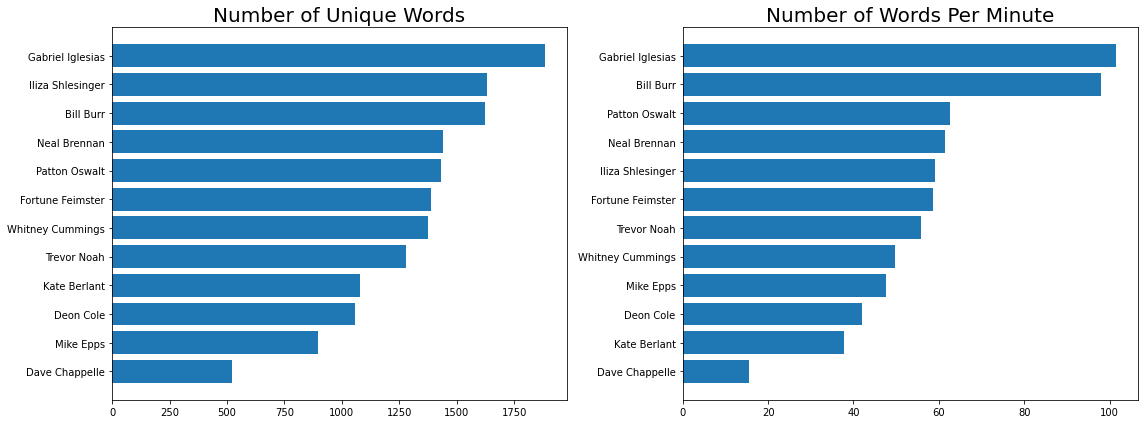

In [ ]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

* **Vocabulary**
   * Gabriel (urf Fluffy) and Iliza use a lot of unique words in their comedy
   * Mike Epps and Dave Chappele have a smaller vocabulary


* **Talking Speed**
   * Gabriel (stand up comedian) and Bill Burr (podcast host) talk fast
   * Kate Berlant and Dave Chappele talk slow
   
The others lie in the middle somewhere

## Amount of Profanity

### Analysis

In [ ]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 12),
 ('just', 12),
 ('know', 12),
 ('right', 12),
 ('im', 12),
 ('dont', 12),
 ('thats', 11),
 ('got', 11),
 ('gonna', 10),
 ('yeah', 10),
 ('youre', 8),
 ('people', 8),
 ('going', 8),
 ('oh', 7),
 ('okay', 7),
 ('think', 7),
 ('did', 6),
 ('time', 6),
 ('cause', 6),
 ('hes', 6),
 ('want', 6),
 ('good', 6),
 ('little', 5),
 ('theyre', 5),
 ('look', 5),
 ('say', 5),
 ('man', 5),
 ('shit', 4),
 ('thing', 4),
 ('women', 4),
 ('said', 4),
 ('uh', 4),
 ('feel', 4),
 ('fuck', 3),
 ('shes', 3),
 ('didnt', 3),
 ('ill', 3),
 ('guys', 3),
 ('theres', 3),
 ('life', 3),
 ('day', 3),
 ('gotta', 2),
 ('ha', 2),
 ('house', 2),
 ('went', 2),
 ('lot', 2),
 ('ngga', 2),
 ('aint', 2),
 ('yall', 2),
 ('old', 2),
 ('come', 2),
 ('nggas', 2),
 ('need', 2),
 ('um', 2),
 ('way', 2),
 ('baby', 2),
 ('ive', 2),
 ('guy', 2),
 ('fuckin', 1),
 ('great', 1),
 ('black', 1),
 ('seen', 1),
 ('kanye', 1),
 ('mean', 1),
 ('started', 1),
 ('honest', 1),
 ('jewish', 1),
 ('jews', 1),
 ('mad', 1),
 ('motherfucke

In [ ]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fcking','fucking', 'fuck','fck','motherfcking','motherfcker','motherfucker', 'shit', 'bitch']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck + data_bad_words.fcking +
                            data_bad_words.fck + data_bad_words.motherfcking + data_bad_words.motherfcker +data_bad_words.motherfucker
                            , data_bad_words.shit + data_bad_words.bitch], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
bill,63,69
dave,0,1
deon,114,172
fortune,0,5
gabriel,7,23
iliza,26,10
kate,0,2
mike,94,40
neal,28,20
patton,46,14


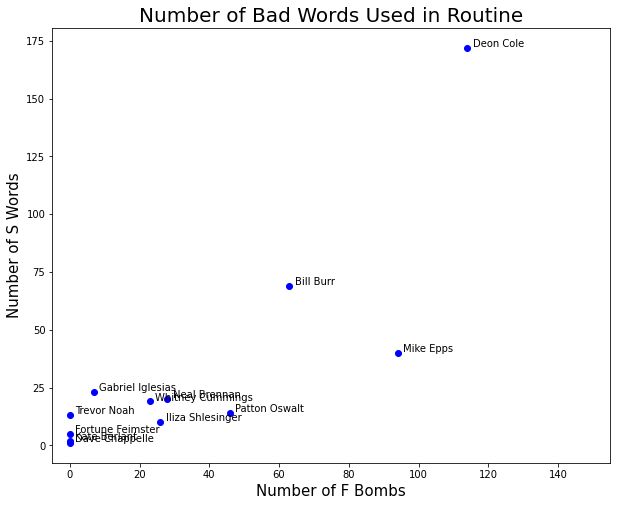

In [ ]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

Dean Cole uses the largest number swear words followed by Bill Blurr. Mike Epps also uses a lot of F-bombs as compared to S-word and B-word. 

The rest of the comedians have almost clean humor. 

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [ ]:
import pandas as pd
# Let's isolate just these gender based words
data_gender_words = data.transpose()[['women', 'girl','girls','shes','man','hes','men','guy','guys','boys']]
data_gender_words



,women,girl,girls,shes,man,hes,men,guy,guys,boys
bill,29,0,0,28,25,12,11,14,23,1
dave,0,0,0,1,6,14,0,3,2,0
deon,26,7,0,3,29,3,10,3,10,0
fortune,1,1,1,12,13,8,1,12,11,0
gabriel,2,6,1,28,11,46,0,12,29,0
iliza,44,41,24,30,5,21,11,8,6,17
kate,4,1,1,5,1,1,1,1,0,1
mike,10,15,13,5,52,6,6,2,0,1
neal,24,8,1,7,8,11,10,13,20,1
patton,1,2,0,17,10,15,1,18,6,0


In [ ]:
datagender = pd.concat([data_gender_words.women + data_gender_words.girl + data_gender_words.girls +
                        data_gender_words.shes, data_gender_words.man + data_gender_words.hes + data_gender_words.men + 
                        data_gender_words.guy + data_gender_words.guys + data_gender_words.boys], axis=1)
datagender.columns = ['females', 'males']
datagender

,females,males
bill,57,86
dave,1,25
deon,36,55
fortune,15,45
gabriel,37,98
iliza,139,68
kate,11,5
mike,43,67
neal,40,63
patton,20,50


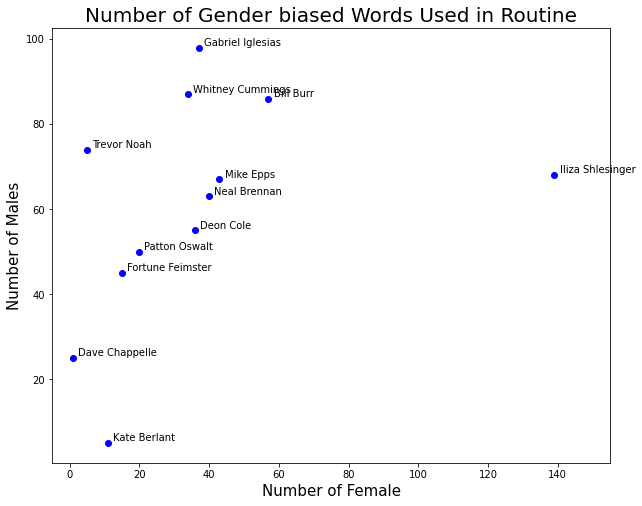

In [ ]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(datagender.index):
    x = datagender.females.loc[comedian]
    y = datagender.males.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Gender biased Words Used in Routine', fontsize=20)
plt.xlabel('Number of Female', fontsize=15)
plt.ylabel('Number of Males', fontsize=15)

plt.show()

Findings

Fluffy uses the most number of male biased words. 

Iliza uses the most number of female biased words. 

On the whole, all the other comedians use more number of female biased words than male biased words. 

# ----------**TASK 3**------------

# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
bill,"[audience cheering, whistling] [emcee] Ladies and gentlemen, Bill Burr! [cheering and applause] All right, thank you! Thank you very much. Thank y...",Bill Burr
dave,"Original air date: November 12, 2022 * * * Ladies and gentlemen, Dave Chappelle. [Cheers and applause] ♪♪ ♪♪ ♪♪ Thank you. Thank you very much for...",Dave Chappelle
deon,"[indistinct chattering] [woman] Oh, this water is so good. I don’t know why I was so thirsty. But anyway, I feel comfortable now. It feels real go...",Deon Cole
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don...,Fortune Feimster
gabriel,[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus yea...,Gabriel Iglesias
iliza,"[upbeat music playing] [crowd cheering] Cleveland, Ohio! Thank you! Thank you so much. This is so great. This is so nice to be here with you in pu...",Iliza Shlesinger
kate,"Whoa! Okay, yeah. Good. Okay, don’t embarrass yourself, okay. Ohh, the expectations. Crushing, I would argue. Absolutely crushing, debilitating in...",Kate Berlant
mike,[Cheers and applause] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Cheers and applause intensify] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Beatboxing]...,Mike Epps
neal,"[gentle music playing] [audience applauding] [audience cheering] All right, let me explain. Friend of mine… “Former friend,” we’ll call her. [audi...",Neal Brennan
patton,[“Hard to Kill” by Bleached plays] [audience cheering and applauding] Hello! Denver! [cheering and applause continues] [Patton laughs] Oh my God! ...,Patton Oswalt


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
bill,"[audience cheering, whistling] [emcee] Ladies and gentlemen, Bill Burr! [cheering and applause] All right, thank you! Thank you very much. Thank y...",Bill Burr,0.064643,0.533482
dave,"Original air date: November 12, 2022 * * * Ladies and gentlemen, Dave Chappelle. [Cheers and applause] ♪♪ ♪♪ ♪♪ Thank you. Thank you very much for...",Dave Chappelle,0.108745,0.535223
deon,"[indistinct chattering] [woman] Oh, this water is so good. I don’t know why I was so thirsty. But anyway, I feel comfortable now. It feels real go...",Deon Cole,-0.007070,0.535422
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don...,Fortune Feimster,0.130376,0.493430
gabriel,[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus yea...,Gabriel Iglesias,0.114103,0.476204
iliza,"[upbeat music playing] [crowd cheering] Cleveland, Ohio! Thank you! Thank you so much. This is so great. This is so nice to be here with you in pu...",Iliza Shlesinger,0.102402,0.505800
kate,"Whoa! Okay, yeah. Good. Okay, don’t embarrass yourself, okay. Ohh, the expectations. Crushing, I would argue. Absolutely crushing, debilitating in...",Kate Berlant,0.196040,0.524353
mike,[Cheers and applause] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Cheers and applause intensify] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Beatboxing]...,Mike Epps,-0.007790,0.498839
neal,"[gentle music playing] [audience applauding] [audience cheering] All right, let me explain. Friend of mine… “Former friend,” we’ll call her. [audi...",Neal Brennan,0.113204,0.517706
patton,[“Hard to Kill” by Bleached plays] [audience cheering and applauding] Hello! Denver! [cheering and applause continues] [Patton laughs] Oh my God! ...,Patton Oswalt,0.053557,0.509105


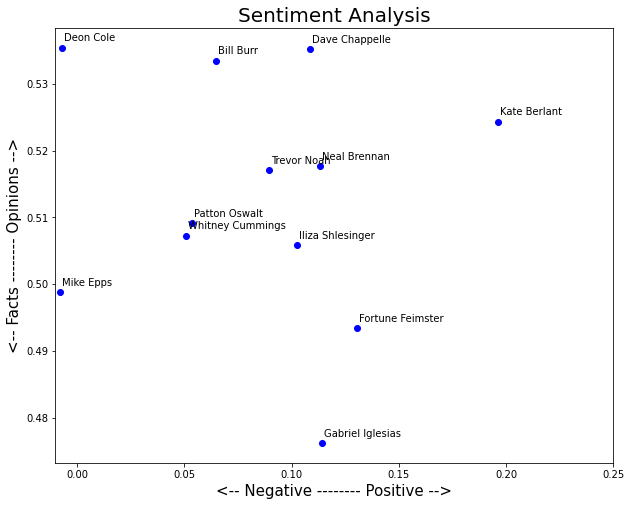

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .25) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Classification:

Polarity

*   Gabriel, Fortune and Kate are more positive than others

Subjectivity

*   All the comedians perform according to thier opinions rather than the facts





## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
bill,"[audience cheering, whistling] [emcee] Ladies and gentlemen, Bill Burr! [cheering and applause] All right, thank you! Thank you very much. Thank y...",Bill Burr,0.064643,0.533482
dave,"Original air date: November 12, 2022 * * * Ladies and gentlemen, Dave Chappelle. [Cheers and applause] ♪♪ ♪♪ ♪♪ Thank you. Thank you very much for...",Dave Chappelle,0.108745,0.535223
deon,"[indistinct chattering] [woman] Oh, this water is so good. I don’t know why I was so thirsty. But anyway, I feel comfortable now. It feels real go...",Deon Cole,-0.007070,0.535422
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don...,Fortune Feimster,0.130376,0.493430
gabriel,[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus yea...,Gabriel Iglesias,0.114103,0.476204
iliza,"[upbeat music playing] [crowd cheering] Cleveland, Ohio! Thank you! Thank you so much. This is so great. This is so nice to be here with you in pu...",Iliza Shlesinger,0.102402,0.505800
kate,"Whoa! Okay, yeah. Good. Okay, don’t embarrass yourself, okay. Ohh, the expectations. Crushing, I would argue. Absolutely crushing, debilitating in...",Kate Berlant,0.196040,0.524353
mike,[Cheers and applause] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Cheers and applause intensify] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Beatboxing]...,Mike Epps,-0.007790,0.498839
neal,"[gentle music playing] [audience applauding] [audience cheering] All right, let me explain. Friend of mine… “Former friend,” we’ll call her. [audi...",Neal Brennan,0.113204,0.517706
patton,[“Hard to Kill” by Bleached plays] [audience cheering and applauding] Hello! Denver! [cheering and applause continues] [Patton laughs] Oh my God! ...,Patton Oswalt,0.053557,0.509105


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["[audience cheering, whistling] [emcee] Ladies and gentlemen, Bill Burr! [cheering and applause] All right, thank you! Thank you very much. Thank you, thank you, thank you. How are ya? How’s it goin’? All right. You guys standin’ up, sit down. Sit down. See if I’m funny. I’ve been inside for a year and a half just like you. All right. It’s nice to be out here in Denver, man. [cheering] [chuckles] It’s legal on a state level, but not on a federal level, man. Everybody out here dressing like they’re fuckin’ goin’ hiking. [chuckles] Your North Face pajamas and all this shit you guys have. You guys all live inside. So, how have you guys been doin’, man? How has your pandemic been? You enjoyed it? You been staying inside? Are you being safe? [man] No! I am so fed up with people… “I ain’t bein’ safe! I don’t fuckin’ believe in it!” “It’s all a bunch of lies!” We’re just totally divided. The people that are like, “You gotta get vaccinated.” “You have to wrap yourself in an afghan, and you g

In [ ]:
list_pieces[0][0]

"[audience cheering, whistling] [emcee] Ladies and gentlemen, Bill Burr! [cheering and applause] All right, thank you! Thank you very much. Thank you, thank you, thank you. How are ya? How’s it goin’? All right. You guys standin’ up, sit down. Sit down. See if I’m funny. I’ve been inside for a year and a half just like you. All right. It’s nice to be out here in Denver, man. [cheering] [chuckles] It’s legal on a state level, but not on a federal level, man. Everybody out here dressing like they’re fuckin’ goin’ hiking. [chuckles] Your North Face pajamas and all this shit you guys have. You guys all live inside. So, how have you guys been doin’, man? How has your pandemic been? You enjoyed it? You been staying inside? Are you being safe? [man] No! I am so fed up with people… “I ain’t bein’ safe! I don’t fuckin’ believe in it!” “It’s all a bunch of lies!” We’re just totally divided. The people that are like, “You gotta get vaccinated.” “You have to wrap yourself in an afghan, and you got

In [ ]:
# The list has 12 elements, one for each transcript
len(list_pieces)

12

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.11242017652916418,
  0.06189131019639499,
  0.06086249760948556,
  0.009337351636458768,
  0.04285476190476187,
  0.06597019760285064,
  0.042193948412698405,
  0.09927792207792217,
  -0.02256869941652553,
  0.17128778594771246],
 [0.06903846153846153,
  0.31801948051948054,
  -0.1262820512820513,
  -0.1084467120181406,
  -0.01632996632996633,
  0.3511428571428571,
  0.17500000000000002,
  0.31702380952380954,
  -0.029877344877344874,
  0.17863756613756615],
 [0.1112847973785473,
  -0.08600849225849228,
  -0.01807291666666667,
  -0.07163832199546485,
  -0.019732856842231847,
  -0.035466269841269854,
  0.01593532038737518,
  0.0740587664990238,
  -0.0732804232804233,
  0.06018840314614961],
 [0.14630810335497832,
  0.042465443912812345,
  0.023533348595848595,
  0.16723748473748476,
  0.10955433455433455,
  0.1560342261904762,
  0.14062736933499645,
  0.18452066011589824,
  0.14730661881977675,
  0.2047253550543024],
 [0.1432371358975342,
  0.14571806472848142,
  0.08103513202197418

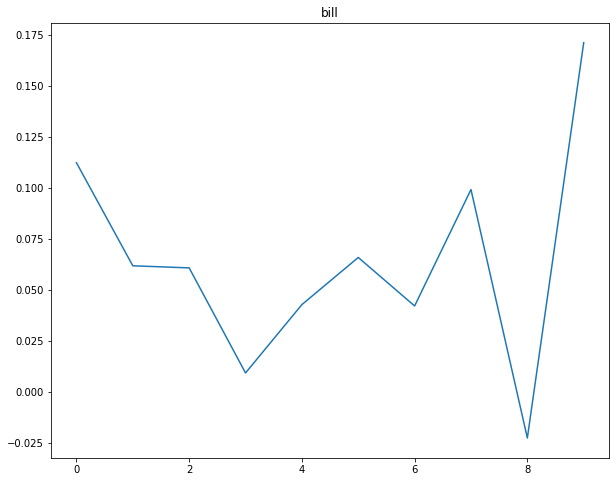

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

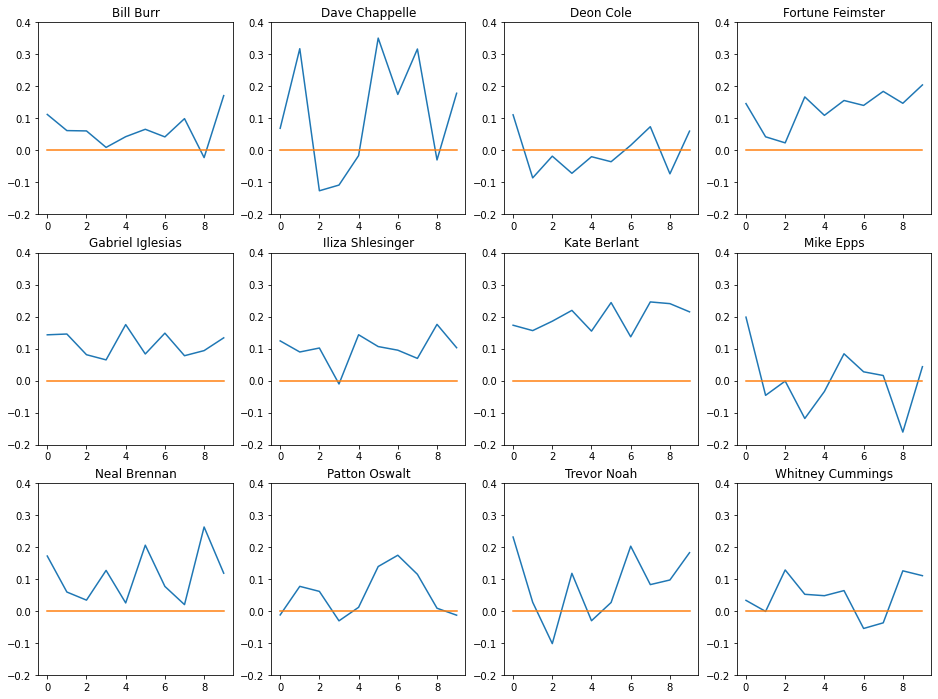

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.4)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [ ]:
# Split each routine into 15 parts
import numpy as np
import math

def split_text1(text, n=15):
    '''Takes in a string of text and splits into n equal parts, with a default of 5 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
data

,transcript,full_name,polarity,subjectivity
bill,"[audience cheering, whistling] [emcee] Ladies and gentlemen, Bill Burr! [cheering and applause] All right, thank you! Thank you very much. Thank y...",Bill Burr,0.064643,0.533482
dave,"Original air date: November 12, 2022 * * * Ladies and gentlemen, Dave Chappelle. [Cheers and applause] ♪♪ ♪♪ ♪♪ Thank you. Thank you very much for...",Dave Chappelle,0.108745,0.535223
deon,"[indistinct chattering] [woman] Oh, this water is so good. I don’t know why I was so thirsty. But anyway, I feel comfortable now. It feels real go...",Deon Cole,-0.007070,0.535422
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don...,Fortune Feimster,0.130376,0.493430
gabriel,[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus yea...,Gabriel Iglesias,0.114103,0.476204
iliza,"[upbeat music playing] [crowd cheering] Cleveland, Ohio! Thank you! Thank you so much. This is so great. This is so nice to be here with you in pu...",Iliza Shlesinger,0.102402,0.505800
kate,"Whoa! Okay, yeah. Good. Okay, don’t embarrass yourself, okay. Ohh, the expectations. Crushing, I would argue. Absolutely crushing, debilitating in...",Kate Berlant,0.196040,0.524353
mike,[Cheers and applause] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Cheers and applause intensify] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Beatboxing]...,Mike Epps,-0.007790,0.498839
neal,"[gentle music playing] [audience applauding] [audience cheering] All right, let me explain. Friend of mine… “Former friend,” we’ll call her. [audi...",Neal Brennan,0.113204,0.517706
patton,[“Hard to Kill” by Bleached plays] [audience cheering and applauding] Hello! Denver! [cheering and applause continues] [Patton laughs] Oh my God! ...,Patton Oswalt,0.053557,0.509105


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces1 = []
for t in data.transcript:
    split = split_text1(t)
    list_pieces1.append(split)
    
list_pieces1

[["[audience cheering, whistling] [emcee] Ladies and gentlemen, Bill Burr! [cheering and applause] All right, thank you! Thank you very much. Thank you, thank you, thank you. How are ya? How’s it goin’? All right. You guys standin’ up, sit down. Sit down. See if I’m funny. I’ve been inside for a year and a half just like you. All right. It’s nice to be out here in Denver, man. [cheering] [chuckles] It’s legal on a state level, but not on a federal level, man. Everybody out here dressing like they’re fuckin’ goin’ hiking. [chuckles] Your North Face pajamas and all this shit you guys have. You guys all live inside. So, how have you guys been doin’, man? How has your pandemic been? You enjoyed it? You been staying inside? Are you being safe? [man] No! I am so fed up with people… “I ain’t bein’ safe! I don’t fuckin’ believe in it!” “It’s all a bunch of lies!” We’re just totally divided. The people that are like, “You gotta get vaccinated.” “You have to wrap yourself in an afghan, and you g

In [ ]:
len(list_pieces1[0]) #15 elements

15

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript1 = []
for lp in list_pieces1:
    polarity_piece1 = []
    for p in lp:
        polarity_piece1.append(TextBlob(p).sentiment.polarity)
    polarity_transcript1.append(polarity_piece1)
    
polarity_transcript1

[[0.1520269432571648,
  0.09203511843961282,
  0.009926224010731045,
  -0.01682539682539682,
  0.09228197877391421,
  0.016468926738583998,
  0.07395331728196891,
  0.015188936271025822,
  0.06302120350627816,
  0.0091819871408479,
  0.13744194821781028,
  0.06063528595174161,
  -0.03635461760461763,
  -0.0003730223149866168,
  0.23724259974259984],
 [0.20500000000000002,
  -0.08055555555555556,
  0.46071428571428574,
  -0.19895833333333332,
  -0.0059027777777777846,
  -0.16118197278911564,
  -0.09743589743589741,
  0.3687318563789152,
  0.22142857142857142,
  0.05,
  0.46142857142857147,
  0.2871212121212121,
  -0.06435335497835498,
  0.05854978354978357,
  0.18754578754578752],
 [0.2201804483054482,
  -0.045738156642411966,
  -0.1136904761904762,
  0.006711017740429496,
  -0.021084656084656074,
  -0.12673611111111113,
  -0.01596790890269151,
  -0.0582286155202822,
  0.0049263038548752755,
  -0.050681836279662364,
  0.1808323412698413,
  -0.011355068542568545,
  0.0014172335600906888,

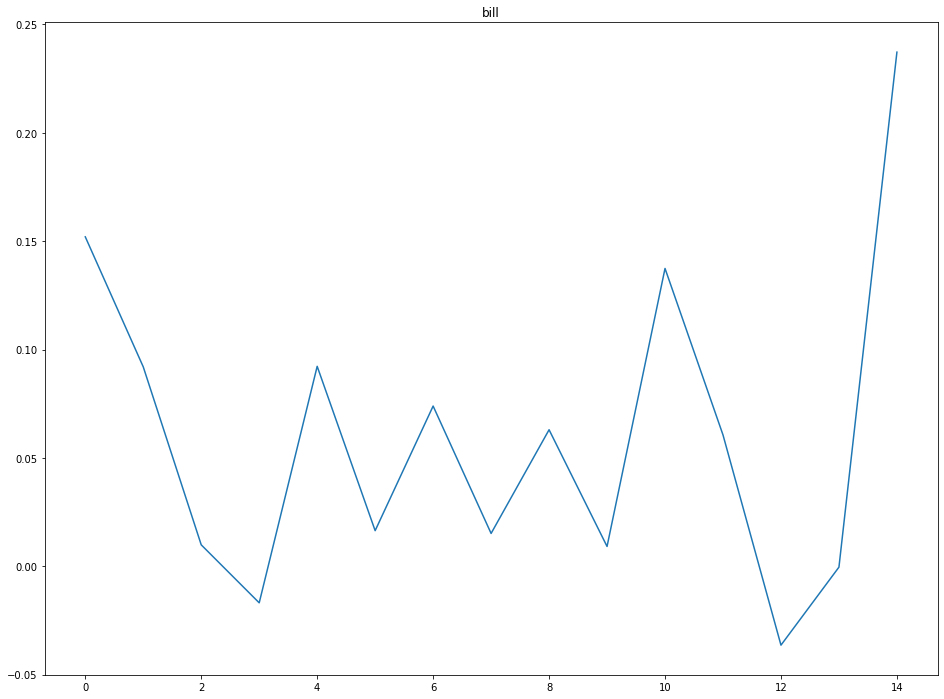

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript1[0])
plt.title(data['full_name'].index[0])
plt.show()

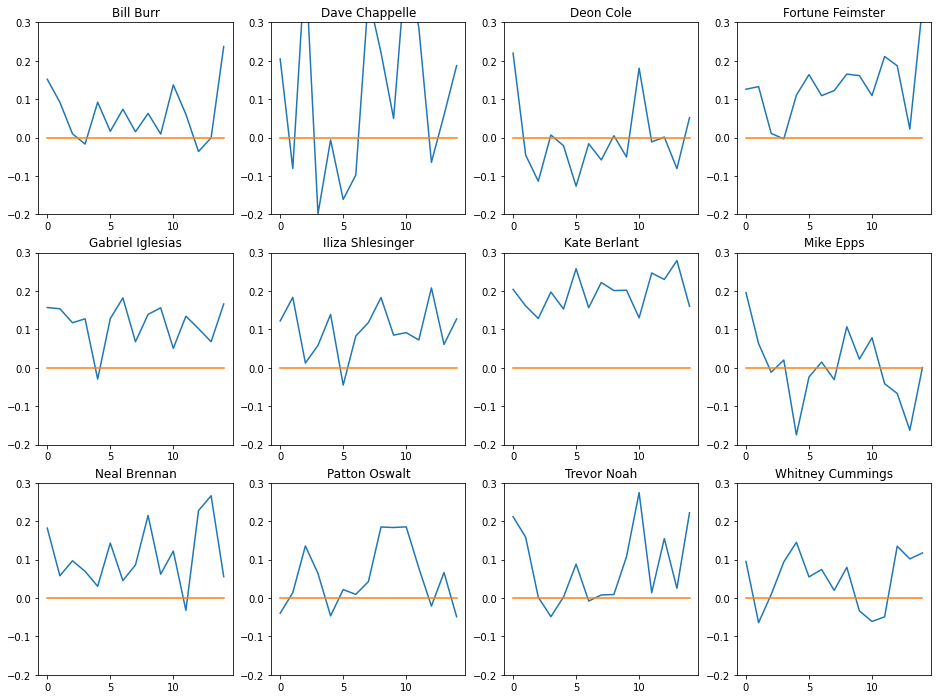

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript1[index])
    plt.plot(np.arange(0,15), np.zeros(15))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

# ----------**TASK 4**------------

# Topic Modeling

## Introduction

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

## Topic Modeling - Attempt #1 (All Text)

In [ ]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

,aaaaaaah,aaaaaah,aaah,aah,aarp,abandon,abandoned,abc,abercrombie,ability,...,zip,zippers,zoned,zones,zoom,zoomed,zsh,álvarez,ándale,ñañaras
bill,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,2,0,0,0,0,0
dave,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
deon,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
fortune,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
gabriel,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,4,0,0,3,1,1
iliza,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,2,0,0,0,0,0
kate,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mike,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neal,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
patton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0


In [ ]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
#Gensim - generate similar
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,bill,dave,deon,fortune,gabriel,iliza,kate,mike,neal,patton,trevor,whitney
aaaaaaah,0,0,0,0,0,0,0,1,0,0,0,0
aaaaaah,0,0,0,0,0,0,0,0,0,0,0,1
aaah,0,0,0,0,1,0,0,0,0,0,0,1
aah,0,1,0,0,0,0,1,1,3,0,0,0
aarp,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [ ]:
id2word

{3497: 'ladies',
 2619: 'gentlemen',
 830: 'burr',
 7116: 'ya',
 3068: 'hows',
 2689: 'goin',
 2793: 'guys',
 5973: 'standin',
 5705: 'sit',
 2561: 'funny',
 3303: 'ive',
 3228: 'inside',
 7126: 'year',
 2815: 'half',
 4224: 'nice',
 1664: 'denver',
 3804: 'man',
 3577: 'legal',
 5990: 'state',
 3605: 'level',
 2284: 'federal',
 2135: 'everybody',
 1898: 'dressing',
 6346: 'theyre',
 2543: 'fuckin',
 2964: 'hiking',
 4263: 'north',
 2203: 'face',
 4481: 'pajamas',
 5622: 'shit',
 3672: 'live',
 1834: 'doin',
 4487: 'pandemic',
 2075: 'enjoyed',
 5998: 'staying',
 5376: 'safe',
 2282: 'fed',
 128: 'aint',
 495: 'bein',
 499: 'believe',
 818: 'bunch',
 3623: 'lies',
 6485: 'totally',
 1803: 'divided',
 2710: 'gotta',
 6749: 'vaccinated',
 7094: 'wrap',
 100: 'afghan',
 1422: 'cover',
 2999: 'hold',
 726: 'breath',
 3702: 'look',
 4638: 'pictures',
 408: 'balls',
 6869: 'walkin',
 6063: 'street',
 966: 'cause',
 3347: 'jesus',
 5381: 'said',
 3363: 'john',
 5086: 'read',
 526: 'bible',
 6

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [ ]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.012*"shit" + 0.007*"ngga" + 0.006*"man" + 0.006*"look" + 0.005*"want" + 0.005*"women" + 0.005*"fuck" + 0.005*"aint" + 0.005*"come" + 0.004*"girl"'),
 (1,
  '0.006*"said" + 0.006*"did" + 0.006*"cause" + 0.005*"time" + 0.005*"fuckin" + 0.005*"theyre" + 0.005*"say" + 0.005*"want" + 0.005*"hes" + 0.005*"good"')]

In [ ]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.008*"want" + 0.007*"women" + 0.007*"girl" + 0.005*"shes" + 0.005*"look" + 0.005*"bra" + 0.004*"good" + 0.004*"girls" + 0.004*"woman" + 0.004*"need"'),
 (1,
  '0.016*"shit" + 0.010*"ngga" + 0.009*"man" + 0.007*"aint" + 0.006*"time" + 0.006*"come" + 0.006*"day" + 0.005*"look" + 0.005*"yall" + 0.005*"motherfucker"'),
 (2,
  '0.007*"said" + 0.006*"did" + 0.006*"cause" + 0.006*"fuckin" + 0.005*"theyre" + 0.005*"say" + 0.005*"want" + 0.005*"good" + 0.005*"shit" + 0.005*"time"')]

In [ ]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.009*"want" + 0.007*"hes" + 0.006*"day" + 0.006*"time" + 0.005*"say" + 0.005*"good" + 0.005*"ill" + 0.004*"life" + 0.004*"feel" + 0.004*"women"'),
 (1,
  '0.006*"good" + 0.006*"said" + 0.006*"cause" + 0.006*"did" + 0.005*"uh" + 0.005*"theyre" + 0.005*"say" + 0.004*"want" + 0.004*"look" + 0.004*"guys"'),
 (2,
  '0.017*"shit" + 0.010*"fuckin" + 0.008*"man" + 0.008*"fuck" + 0.008*"ngga" + 0.006*"look" + 0.006*"come" + 0.006*"aint" + 0.006*"little" + 0.005*"time"'),
 (3,
  '0.008*"said" + 0.006*"hes" + 0.006*"cause" + 0.005*"did" + 0.005*"theyre" + 0.005*"guys" + 0.005*"little" + 0.005*"time" + 0.005*"say" + 0.005*"want"')]

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

## Topic Modeling - Attempt #2 (Nouns Only)

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.). Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [ ]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [ ]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
bill,ladies and gentlemen bill burr all right very much how are ya hows it goin all right you guys standin up sit down sit down see if im funny...
dave,original air date november ladies and gentlemen dave chappelle very much for being here before i start tonight i just wanted to read a ...
deon,oh this water is so good i dont know why i was so thirsty but anyway i feel comfortable now it feels real good in here yeah its so good to see y...
fortune,please welcome fortune feimster im a powerful woman always get what i want so dont you get in my way now thats not what i want cause im ...
gabriel,can you please state your name martin moreno but you might know me as martinnnnn ive been touring with gabriel iglesias for years martinnnnn and...
iliza,cleveland ohio so much this is so great this is so nice to be here with you in public were not stuck at home doing this for ten likes ah thats...
kate,whoa okay yeah good okay dont embarrass yourself okay ohh the expectations crushing i would argue absolutely crushing debilitating in every way im...
mike,if youre born and raised in the d make some noise and give it up from hollywood to the d for my brother — mike epps lets go a...
neal,all right let me explain friend of mine former friend well call her is an artist right and the theme of our friendship is kind of feeling alon...
patton,hello denver oh my god hello oh my god yes all so much for coming out tonight um hey i broke my foot yeah thats how i started my year i ...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
bill,ladies gentlemen bill hows sit see year half man state level level man everybody theyre goin face pajamas shit man i people bein i bunch lies peop...
dave,air date november ladies gentlemen tonight i statement i denounce antisemitism forms friends community kanye time years career i words language se...
deon,water i i netflix cole seminar cole cole seminar people gon peanut butter relationships sex ill feeling man appreciate yall man motherfucking your...
fortune,fortune feimster woman i way cause im woman i way cause im woman i way cause im woman woman man stop chicago man chicago shakespeare theater lot c...
gabriel,state name martin moreno martinnnnn gabriel iglesias years hes name years dude thats marriages win journey garages clubs rooms theaters arenas wor...
iliza,cleveland home likes thats blight history one people key freedom i need book ill likes money tiktok youre smokin girls skill dudes job chloe futur...
kate,whoa okay okay dont embarrass expectations i way im gon cause ill kate kate right i know comedian uh stand cameras night camera camera huh moment ...
mike,youre d noise hollywood d brother — mike epps lets cabbage cabbage patch papa c papa papa c reebok im fcking legs stinky legs stinky legs stinky l...
neal,friend friend artist right theme friendship kind world right show feeling i script i hey backdrop i days alienation grade speech therapists office...
patton,hello denver god hello hey i foot yeah year i foot parts part curb i part part part i everythings fatal i i twenties propellers bactine i pine con...


In [ ]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaaah,aaah,aah,abc,ability,abortion,abuse,ac,academy,accent,...,youth,youve,zah,zaras,zeke,zippers,zones,zoom,zsh,álvarez
bill,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
deon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
fortune,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
gabriel,0,1,0,1,0,0,0,1,6,0,...,0,2,0,0,0,0,1,3,0,3
iliza,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,1,0,0,2,0,0
kate,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
mike,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
patton,0,0,0,0,0,0,0,1,0,0,...,1,4,0,0,0,0,0,2,1,0


In [ ]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.008*"thing" + 0.008*"cause" + 0.007*"gon" + 0.007*"way" + 0.007*"man" + 0.007*"hes" + 0.007*"shit" + 0.007*"shes" + 0.006*"guy" + 0.005*"day"'),
 (1,
  '0.011*"man" + 0.009*"women" + 0.008*"day" + 0.008*"shit" + 0.007*"hes" + 0.007*"way" + 0.006*"life" + 0.006*"gon" + 0.006*"cause" + 0.006*"thing"')]

In [ ]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.011*"hes" + 0.009*"day" + 0.008*"thing" + 0.008*"okay" + 0.008*"way" + 0.008*"cause" + 0.007*"life" + 0.006*"shes" + 0.006*"things" + 0.006*"lot"'),
 (1,
  '0.015*"man" + 0.014*"shit" + 0.008*"women" + 0.007*"ngga" + 0.007*"motherfucker" + 0.007*"fuck" + 0.006*"gon" + 0.006*"ass" + 0.006*"way" + 0.006*"day"'),
 (2,
  '0.011*"shit" + 0.009*"kids" + 0.009*"gon" + 0.009*"fuck" + 0.009*"man" + 0.008*"thing" + 0.008*"women" + 0.007*"cause" + 0.007*"guy" + 0.007*"way"')]

In [ ]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.009*"cause" + 0.008*"thing" + 0.008*"way" + 0.007*"women" + 0.006*"life" + 0.006*"lot" + 0.005*"dogs" + 0.005*"theyre" + 0.005*"guy" + 0.005*"year"'),
 (1,
  '0.021*"shit" + 0.018*"man" + 0.011*"women" + 0.011*"fuck" + 0.009*"gon" + 0.009*"ngga" + 0.008*"motherfucker" + 0.007*"look" + 0.007*"ass" + 0.007*"thing"'),
 (2,
  '0.010*"hes" + 0.008*"shes" + 0.007*"gon" + 0.007*"way" + 0.006*"okay" + 0.006*"cause" + 0.006*"home" + 0.006*"guy" + 0.006*"women" + 0.006*"girl"'),
 (3,
  '0.014*"day" + 0.009*"hes" + 0.009*"thing" + 0.009*"okay" + 0.009*"man" + 0.008*"way" + 0.008*"cause" + 0.008*"life" + 0.007*"kids" + 0.007*"gon"')]

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [ ]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
bill,ladies gentlemen bill right much ya hows sit see im funny ive year half nice denver man legal state level federal level man everybody theyre goin ...
dave,original air date november ladies gentlemen i tonight i brief statement i i denounce antisemitism forms i friends jewish community kanye time i i ...
deon,water good i i thirsty i comfortable real good good netflix cole seminar cole cole seminar people gon peanut butter relationships sex ill yall fee...
fortune,welcome fortune feimster powerful woman i way cause im powerful woman i way cause im powerful woman i way cause im powerful woman powerful woman o...
gabriel,state name martin moreno martinnnnn gabriel iglesias years yeah hes name years martinnnnn dude thats most marriages win incredible journey garages...
iliza,cleveland much great nice public home ten likes thats real blight american history one people i key financial freedom i need book ill ten likes mo...
kate,whoa okay good okay dont embarrass expectations i way im gon cause thin ill kate kate right i know comedian uh mic stand cameras big night big cam...
mike,youre d noise hollywood d brother — mike epps lets right cabbage cabbage patch papa c papa papa c reebok im im fcking stinky legs legs stinky legs...
neal,right friend mine former friend artist right theme friendship kind world right i show feeling i script i hey backdrop i days alienation more secon...
patton,hello denver god hello god much tonight hey i foot yeah i year i foot parts second part i curb i wrong second part first important part i crucial ...


In [ ]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaaah,aaah,aah,aarp,abandoned,abc,abercrombie,ability,able,abortion,...,youve,zah,zaras,zeke,zenlike,zippers,zones,zoom,zsh,álvarez
bill,0,0,0,1,0,0,0,1,1,2,...,1,0,0,0,1,0,0,2,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
deon,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
fortune,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
gabriel,0,1,0,0,0,1,0,0,0,0,...,2,0,0,0,0,0,1,3,0,3
iliza,0,0,0,0,0,0,2,0,2,0,...,7,0,0,1,0,0,0,2,0,0
kate,0,0,1,0,0,0,0,0,2,0,...,1,0,1,0,0,0,0,0,0,0
mike,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
neal,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
patton,0,0,0,0,0,0,0,0,2,0,...,4,0,0,0,0,0,0,2,1,0


In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.010*"fuckin" + 0.007*"fuck" + 0.004*"motherfucker" + 0.004*"dog" + 0.004*"bitch" + 0.003*"ha" + 0.003*"ass" + 0.003*"dogs" + 0.003*"fact" + 0.003*"ngga"'),
 (1,
  '0.006*"ngga" + 0.004*"indian" + 0.004*"girls" + 0.003*"sex" + 0.003*"curry" + 0.003*"fuck" + 0.003*"bra" + 0.002*"kid" + 0.002*"hell" + 0.002*"normal"')]

In [ ]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.011*"ngga" + 0.005*"jax" + 0.004*"motherfcker" + 0.004*"btch" + 0.004*"yall" + 0.003*"ass" + 0.003*"btches" + 0.003*"fck" + 0.003*"girls" + 0.003*"pussy"'),
 (1,
  '0.013*"fuckin" + 0.008*"fuck" + 0.003*"kid" + 0.003*"sex" + 0.003*"wrong" + 0.003*"wife" + 0.003*"dude" + 0.003*"girls" + 0.003*"weird" + 0.003*"idea"'),
 (2,
  '0.007*"motherfucker" + 0.006*"indian" + 0.006*"bitch" + 0.005*"order" + 0.004*"curry" + 0.004*"ngga" + 0.004*"ass" + 0.004*"fuck" + 0.004*"fact" + 0.003*"normal"')]

In [ ]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.012*"fuckin" + 0.009*"fuck" + 0.005*"motherfucker" + 0.004*"bitch" + 0.004*"dog" + 0.004*"ass" + 0.003*"wife" + 0.003*"story" + 0.003*"ngga" + 0.003*"fact"'),
 (1,
  '0.012*"indian" + 0.008*"curry" + 0.006*"order" + 0.005*"normal" + 0.005*"trevor" + 0.004*"news" + 0.004*"food" + 0.004*"family" + 0.004*"german" + 0.004*"moment"'),
 (2,
  '0.005*"girls" + 0.005*"fuck" + 0.004*"bra" + 0.004*"kid" + 0.004*"sex" + 0.003*"boobs" + 0.003*"idea" + 0.003*"wrong" + 0.003*"older" + 0.003*"tiktok"'),
 (3,
  '0.020*"ngga" + 0.008*"motherfcker" + 0.007*"btch" + 0.006*"yall" + 0.006*"btches" + 0.006*"fck" + 0.006*"ass" + 0.006*"black" + 0.005*"pussy" + 0.005*"girls"')]

## Identify Topics in Each Document

Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.012*"fuckin" + 0.005*"ngga" + 0.005*"fuck" + 0.004*"indian" + 0.003*"mom" + 0.003*"dude" + 0.003*"fact" + 0.003*"minutes" + 0.003*"order" + 0.003*"curry"'),
 (1,
  '0.008*"fuck" + 0.007*"motherfucker" + 0.005*"ha" + 0.005*"bitch" + 0.005*"ngga" + 0.004*"ass" + 0.003*"sex" + 0.003*"dog" + 0.003*"black" + 0.003*"pubes"'),
 (2,
  '0.000*"obama" + 0.000*"finest" + 0.000*"snap" + 0.000*"traps" + 0.000*"jobs" + 0.000*"famous" + 0.000*"proposal" + 0.000*"bond" + 0.000*"cocaine" + 0.000*"barack"'),
 (3,
  '0.008*"bra" + 0.008*"girls" + 0.005*"bed" + 0.005*"tiktok" + 0.004*"husband" + 0.004*"cute" + 0.004*"nice" + 0.003*"gentlemen" + 0.003*"idea" + 0.003*"bras"')]

These four topics look pretty decent. Let's settle on these for now.
* Topic 0: Indian, mom
* Topic 1: sex
* Topic 2: obama, jobs
* Topic 3: girls, husbands

In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(0, 'bill'),
 (1, 'dave'),
 (1, 'deon'),
 (0, 'fortune'),
 (0, 'gabriel'),
 (3, 'iliza'),
 (1, 'kate'),
 (0, 'mike'),
 (1, 'neal'),
 (1, 'patton'),
 (0, 'trevor'),
 (0, 'whitney')]

For a first pass of LDA, these kind of make sense to me, so we'll call it a day for now.
* Topic 0: mom, indian [Bill, Fortune, Gabriel, Mike, Trevor, Whitney]
* Topic 1: husband, wife [Dave, Deon, Kate, Neal, Patton]
* Topic 2: guns [Bill, Bo, Jim]
* Topic 3: Girls, husbands [Iliza]

### Assignment:
1. Try further modifying the parameters of the topic models above and see if you can get better topics.
2. Create a new topic model that includes terms from a different [part of speech](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and see if you can get better topics.

Passes is the number of times you want to go through the entire corpus.  it will output the most probable words that appear in each topic. 

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=50)
ldana.print_topics()

[(0,
  '0.005*"jax" + 0.004*"sex" + 0.004*"fuck" + 0.004*"pubes" + 0.004*"kid" + 0.003*"dude" + 0.003*"boobs" + 0.003*"picture" + 0.003*"wife" + 0.003*"older"'),
 (1,
  '0.018*"fuckin" + 0.008*"fuck" + 0.007*"indian" + 0.005*"curry" + 0.004*"black" + 0.004*"dad" + 0.003*"order" + 0.003*"news" + 0.003*"normal" + 0.003*"somebody"'),
 (2,
  '0.006*"bra" + 0.006*"girls" + 0.004*"bed" + 0.004*"tiktok" + 0.004*"husband" + 0.004*"sex" + 0.003*"beautiful" + 0.003*"nice" + 0.003*"cute" + 0.003*"weight"'),
 (3,
  '0.014*"ngga" + 0.008*"motherfucker" + 0.007*"ass" + 0.006*"bitch" + 0.005*"yall" + 0.004*"nggas" + 0.004*"fuck" + 0.004*"aint" + 0.004*"dog" + 0.004*"goddamn"')]

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=5, id2word=id2wordna, passes=100)
ldana.print_topics()

[(0,
  '0.010*"indian" + 0.007*"curry" + 0.006*"bra" + 0.005*"normal" + 0.005*"order" + 0.005*"girls" + 0.004*"food" + 0.004*"news" + 0.004*"trevor" + 0.004*"bed"'),
 (1,
  '0.004*"sex" + 0.004*"jax" + 0.004*"stuff" + 0.004*"fuck" + 0.003*"pubes" + 0.003*"kid" + 0.003*"dude" + 0.003*"line" + 0.003*"wife" + 0.003*"mom"'),
 (2,
  '0.022*"motherfucker" + 0.015*"bitch" + 0.013*"ngga" + 0.011*"fuck" + 0.010*"ass" + 0.007*"ha" + 0.007*"yall" + 0.007*"young" + 0.007*"older" + 0.007*"motherfuckers"'),
 (3,
  '0.017*"fuckin" + 0.008*"fuck" + 0.004*"dogs" + 0.004*"dog" + 0.004*"story" + 0.003*"dad" + 0.003*"fact" + 0.003*"street" + 0.003*"wrong" + 0.003*"relationship"'),
 (4,
  '0.025*"ngga" + 0.010*"motherfcker" + 0.009*"btch" + 0.008*"fck" + 0.008*"btches" + 0.007*"yall" + 0.007*"pussy" + 0.007*"ass" + 0.006*"girls" + 0.006*"nggas"')]

In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(3, 'bill'),
 (1, 'dave'),
 (2, 'deon'),
 (1, 'fortune'),
 (3, 'gabriel'),
 (0, 'iliza'),
 (1, 'kate'),
 (4, 'mike'),
 (3, 'neal'),
 (1, 'patton'),
 (0, 'trevor'),
 (1, 'whitney')]

##INFERENCE

* Topic 0: indian, girls [Iliza, Trevor]
* Topic 1: kids, wife [Dave, Fortune, Kate, Whitney, Patton]
* Topic 2: young, old [Deon]
* Topic 3: dogs, dad [Bill, Gabriel, Neal]
* Topic 4: Girls [Mike]

In [ ]:
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','fcking','fucking', 'fuck','fck','motherfcking','motherfcker','motherfucker', 'shit', 'bitch']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [ ]:
# Let's create a function to pull out adverbs from a string of text
def adverb(text):
    '''Given a string of text, tokenize the text and pull out only the adverb.'''
    is_adverb = lambda pos: pos[:2] == 'RB'
    tokenized = word_tokenize(text)
    adverb = [word for (word, pos) in pos_tag(tokenized) if is_adverb(pos)] 
    return ' '.join(adverb)

In [ ]:
# Apply the adverbs function to the transcripts to filter only on adverbs
data_adverb = pd.DataFrame(data_clean.transcript.apply(adverb))
data_adverb

,transcript
bill,very all right inside just here not here inside so inside so just totally cover then nose then america america well i never never never so ta so r...
dave,very much here just probably now early never together never normally immediately first just just even vaguely im then just up all so not just arou...
deon,so so anyway now here so na na else out tonight much lately even too always instead na yeah ill id now youre too still here really then really jus...
fortune,always so now not always so now not always so now not always here right south just just yall not not not not very literally actually just not most...
gabriel,martinnnnn better now no longer so ever so else rockin now ya never didnt so much so very here already so just finally right antonio now ever here...
iliza,so so so here not right just never ugly only now oh never now here never never very just youd never just always well not side well so come now nev...
kate,yeah absolutely so so then youll so so really so everywhere inherently not actually inherently yes right yeah very even absolutely very just i act...
mike,right right here here i right here right here here right here right here always yall up right here just here nggas here again again totally brothe...
neal,well alone then less i so im smoothly just not away up technically more well start right so never right so back so maybe just never then i not nev...
patton,yes so most once i now dont then all right almost so i well probably all much once even then then not just even down down most still just actually...


In [ ]:
# Create a new document-term matrix using only adverbs, also remove common words with max_df
cvn = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvn = cvn.fit_transform(data_adverb.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_adverb.index
data_dtmn

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aah,absolutely,accidentally,actively,activism,actually,adequately,adultd,agh,ago,...,yakyakyak,yall,yard,yay,yeeroh,yell,yes,youd,youll,youve
bill,0,3,1,0,0,7,0,0,0,0,...,1,0,0,0,0,1,3,3,0,1
dave,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
deon,0,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,2,0,3,0
fortune,0,3,0,0,0,6,0,0,1,0,...,0,2,1,0,0,0,1,1,1,0
gabriel,0,1,0,0,0,3,0,0,0,5,...,0,0,0,1,2,0,2,0,0,1
iliza,0,0,1,0,0,2,1,0,0,2,...,0,0,0,0,0,0,3,1,2,8
kate,0,7,0,1,1,33,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
mike,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,1
neal,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,2,1,1
patton,0,1,0,0,0,8,0,0,0,1,...,0,0,0,0,0,0,3,1,0,0


In [ ]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.079*"actually" + 0.029*"pretty" + 0.022*"recently" + 0.020*"immediately" + 0.018*"absolutely" + 0.014*"youd" + 0.014*"theyd" + 0.012*"okay" + 0.012*"completely" + 0.012*"anymore"'),
 (1,
  '0.039*"na" + 0.031*"ta" + 0.031*"actually" + 0.026*"finally" + 0.020*"okay" + 0.018*"long" + 0.015*"yes" + 0.013*"totally" + 0.013*"far" + 0.013*"inside"')]

In [ ]:
# Let's start with 3 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.043*"pretty" + 0.022*"recently" + 0.022*"youd" + 0.015*"theyd" + 0.015*"completely" + 0.015*"eventually" + 0.015*"totally" + 0.015*"anymore" + 0.015*"actually" + 0.015*"basically"'),
 (1,
  '0.030*"na" + 0.023*"finally" + 0.022*"okay" + 0.019*"ta" + 0.018*"ngga" + 0.017*"youve" + 0.017*"long" + 0.017*"forward" + 0.015*"totally" + 0.015*"ago"'),
 (2,
  '0.102*"actually" + 0.038*"ta" + 0.034*"na" + 0.027*"absolutely" + 0.023*"finally" + 0.019*"immediately" + 0.017*"okay" + 0.017*"literally" + 0.016*"long" + 0.016*"ill"')]

In [ ]:
# Let's start with 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.050*"okay" + 0.045*"youve" + 0.029*"constantly" + 0.018*"tight" + 0.018*"yes" + 0.012*"actually" + 0.012*"na" + 0.012*"ago" + 0.012*"forward" + 0.012*"barely"'),
 (1,
  '0.004*"actually" + 0.003*"finally" + 0.003*"okay" + 0.003*"immediately" + 0.003*"recently" + 0.003*"na" + 0.003*"absolutely" + 0.003*"yes" + 0.003*"ta" + 0.003*"ago"'),
 (2,
  '0.073*"actually" + 0.029*"finally" + 0.029*"na" + 0.025*"ta" + 0.025*"pretty" + 0.020*"long" + 0.018*"absolutely" + 0.017*"okay" + 0.016*"immediately" + 0.015*"far"'),
 (3,
  '0.041*"na" + 0.036*"ta" + 0.018*"lonely" + 0.018*"ngga" + 0.018*"silly" + 0.015*"long" + 0.015*"yall" + 0.015*"theyd" + 0.015*"yes" + 0.014*"ill"')]

##INFERENCE

In [ ]:
# Let's create a function to pull out adverbs from a string of text
def adverb_noun_adj(text):
    '''Given a string of text, tokenize the text and pull out only the adverb.'''
    is_adverb = lambda pos: pos[:2] == 'RB' or pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    adverb = [word for (word, pos) in pos_tag(tokenized) if is_adverb(pos)] 
    return ' '.join(adverb)

In [ ]:
# Apply the adverbs function to the transcripts to filter only on adverbs
data_adverb = pd.DataFrame(data_clean.transcript.apply(adverb_noun_adj))
data_adverb

,transcript
bill,ladies gentlemen bill right very much ya hows all right sit see im funny ive inside year half just nice here denver man legal state level not fede...
dave,original air date november ladies gentlemen very much here i tonight i just brief statement i i denounce antisemitism forms i friends jewish commu...
deon,water so good i i so thirsty anyway i comfortable now real good here so good netflix na cole seminar na cole cole seminar people gon peanut butter...
fortune,welcome fortune feimster powerful woman always i so way now not cause im powerful woman always i so way now not cause im powerful woman always i s...
gabriel,state name martin moreno martinnnnn gabriel iglesias years martinnnnn yeah hes name years martinnnnn dude thats better most marriages win incredib...
iliza,cleveland so much so great so nice here public not home ten likes thats right real blight american history one people i key financial freedom i ne...
kate,whoa okay yeah good okay dont embarrass expectations i absolutely way im gon cause so thin ill so then youll kate kate right i know comedian uh mi...
mike,youre d noise hollywood d brother — mike epps lets right right cabbage cabbage patch papa c papa papa c reebok im im fcking stinky legs legs stink...
neal,right friend mine former friend well artist right theme friendship kind alone world right i show feeling i script i hey backdrop i then days less ...
patton,hello denver god hello god yes so much tonight hey i foot yeah i year i foot parts second part i curb i wrong second part first most important par...


In [ ]:
# Create a new document-term matrix using only adverbs, also remove common words with max_df
cvn = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvn = cvn.fit_transform(data_adverb.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_adverb.index
data_dtmn

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaaah,aaah,aah,aarp,abandoned,abc,abercrombie,ability,able,abortion,...,youve,zah,zaras,zeke,zenlike,zippers,zones,zoom,zsh,álvarez
bill,0,0,0,1,0,0,0,1,1,2,...,2,0,0,0,1,0,0,2,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
deon,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
fortune,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
gabriel,0,1,0,0,0,1,0,0,0,0,...,3,0,0,0,0,0,1,3,0,3
iliza,0,0,0,0,0,0,2,0,2,0,...,15,0,0,1,0,0,0,2,0,0
kate,0,0,1,0,0,0,0,0,2,0,...,1,0,1,0,0,0,0,0,0,0
mike,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
neal,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
patton,0,0,0,0,0,0,0,0,2,0,...,4,0,0,0,0,0,0,2,1,0


In [ ]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.010*"ngga" + 0.005*"yall" + 0.005*"indian" + 0.004*"ass" + 0.003*"black" + 0.003*"ha" + 0.003*"curry" + 0.003*"nggas" + 0.003*"dog" + 0.003*"aint"'),
 (1,
  '0.010*"fuckin" + 0.004*"actually" + 0.003*"sex" + 0.003*"dude" + 0.003*"kid" + 0.002*"story" + 0.002*"idea" + 0.002*"girls" + 0.002*"youve" + 0.002*"minutes"')]

In [ ]:
# Let's start with 3 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.007*"actually" + 0.004*"jax" + 0.004*"stuff" + 0.003*"kid" + 0.003*"mom" + 0.003*"sex" + 0.003*"dude" + 0.003*"boobs" + 0.003*"older" + 0.003*"minutes"'),
 (1,
  '0.011*"fuckin" + 0.004*"indian" + 0.003*"wrong" + 0.003*"curry" + 0.003*"story" + 0.003*"dogs" + 0.003*"order" + 0.003*"dog" + 0.003*"fact" + 0.002*"covid"'),
 (2,
  '0.016*"ngga" + 0.007*"yall" + 0.006*"ass" + 0.006*"girls" + 0.005*"nggas" + 0.004*"aint" + 0.004*"bra" + 0.004*"ha" + 0.004*"black" + 0.004*"bed"')]

In [ ]:
# Let's start with 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=100)
ldan.print_topics()

[(0,
  '0.008*"bra" + 0.007*"girls" + 0.005*"bed" + 0.005*"youve" + 0.005*"tiktok" + 0.004*"cute" + 0.004*"nice" + 0.004*"husband" + 0.003*"gentlemen" + 0.003*"idea"'),
 (1,
  '0.015*"fuckin" + 0.004*"fact" + 0.003*"story" + 0.003*"dogs" + 0.003*"martin" + 0.003*"jax" + 0.003*"wife" + 0.003*"dog" + 0.003*"minutes" + 0.003*"street"'),
 (2,
  '0.019*"ngga" + 0.008*"yall" + 0.008*"ass" + 0.006*"nggas" + 0.005*"ha" + 0.005*"aint" + 0.005*"goddamn" + 0.004*"black" + 0.004*"dog" + 0.004*"pussy"'),
 (3,
  '0.007*"actually" + 0.006*"indian" + 0.005*"curry" + 0.004*"sex" + 0.003*"pubes" + 0.003*"order" + 0.003*"kid" + 0.003*"news" + 0.003*"normal" + 0.003*"weird"')]

In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldan[corpusn]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmn.index))

[(1, 'bill'),
 (1, 'dave'),
 (2, 'deon'),
 (1, 'fortune'),
 (1, 'gabriel'),
 (0, 'iliza'),
 (3, 'kate'),
 (2, 'mike'),
 (2, 'neal'),
 (3, 'patton'),
 (3, 'trevor'),
 (3, 'whitney')]

* Topic 0: Girls, husbands [Iliza]
* Topic 1: dogs, wife [Bill, Dave, Fortune, Gabriel]
* Topic 2: black [Deon, Mike, Neal]
* Topic 3: Indian, Kid [Kate, Patton, Trevor, Whitney]

# ----------**TASK 5**------------

# Text Generation

Markov chains can be used for very basic text generation. Think about every word in a corpus as a state. We can make a simple assumption that the next word is only dependent on the previous word - which is the basic assumption of a Markov chain.

Markov chains don't generate text as well as deep learning, but it's a good (and fun!) start.

## Select Text to Imitate

In this notebook, we're specifically going to generate text in the style of Ali Wong, so as a first step, let's extract the text from her comedy routine.

In [ ]:
# Read in the corpus, including punctuation!
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
bill,"[audience cheering, whistling] [emcee] Ladies and gentlemen, Bill Burr! [cheering and applause] All right, thank you! Thank you very much. Thank y...",Bill Burr
dave,"Original air date: November 12, 2022 * * * Ladies and gentlemen, Dave Chappelle. [Cheers and applause] ♪♪ ♪♪ ♪♪ Thank you. Thank you very much for...",Dave Chappelle
deon,"[indistinct chattering] [woman] Oh, this water is so good. I don’t know why I was so thirsty. But anyway, I feel comfortable now. It feels real go...",Deon Cole
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don...,Fortune Feimster
gabriel,[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus yea...,Gabriel Iglesias
iliza,"[upbeat music playing] [crowd cheering] Cleveland, Ohio! Thank you! Thank you so much. This is so great. This is so nice to be here with you in pu...",Iliza Shlesinger
kate,"Whoa! Okay, yeah. Good. Okay, don’t embarrass yourself, okay. Ohh, the expectations. Crushing, I would argue. Absolutely crushing, debilitating in...",Kate Berlant
mike,[Cheers and applause] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Cheers and applause intensify] Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! Hoo! [Beatboxing]...,Mike Epps
neal,"[gentle music playing] [audience applauding] [audience cheering] All right, let me explain. Friend of mine… “Former friend,” we’ll call her. [audi...",Neal Brennan
patton,[“Hard to Kill” by Bleached plays] [audience cheering and applauding] Hello! Denver! [cheering and applause continues] [Patton laughs] Oh my God! ...,Patton Oswalt


In [ ]:
# Extract only Kate's text
ali_text = data.transcript.loc['kate']
ali_text[:200]

'Whoa! Okay, yeah. Good. Okay, don’t embarrass yourself, okay. Ohh, the expectations. Crushing, I would argue. Absolutely crushing, debilitating in every way. I’m gonna move this, ’cause I’m so thin I’'

## Build a Markov Chain Function

We are going to build a simple Markov chain function that creates a dictionary:
* The keys should be all of the words in the corpus
* The values should be a list of the words that follow the keys

In [ ]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [ ]:
# Create the dictionary for Ali's routine, take a look at it
ali_dict = markov_chain(ali_text)
ali_dict

{'Whoa!': ['Okay,', 'And'],
 'Okay,': ['yeah.',
  'don’t',
  'it’s',
  'ten',
  'and…',
  'so',
  'so',
  'I’m',
  'great.',
  'did',
  'um…',
  'okay!',
  'wow.',
  'we’ll,',
  'okay,',
  'sorry,',
  'got',
  'whoa,',
  'should'],
 'yeah.': ['Good.',
  'Very',
  'So',
  'But…',
  'I',
  'Hope',
  'That’s',
  'Okay.',
  'Okay,',
  'I’m',
  'Were',
  'I’ve',
  '40',
  'That’s',
  'Oh,',
  'Okay.'],
 'Good.': ['Okay,'],
 'don’t': ['embarrass',
  'know',
  'know',
  'know,',
  'know',
  'even',
  'wanna',
  'explore.',
  'know.',
  'know',
  'know.',
  'know.”',
  'know.',
  'know.',
  'have',
  'see',
  'see',
  'know',
  'want',
  'show',
  'let',
  'you',
  'know,',
  'have',
  'know.',
  'know.',
  'have',
  'worry.',
  'forget',
  'want',
  'know…'],
 'embarrass': ['yourself,'],
 'yourself,': ['okay.'],
 'okay.': ['Ohh,',
  'I’m',
  'I’m',
  'Back',
  'You’re',
  'When',
  'I',
  '“Okay,',
  'Ohh!'],
 'Ohh,': ['the', 'I', 'how'],
 'the': ['expectations.',
  'comedian,',
  'mic',
  'c

## Create a Text Generator

We're going to create a function that generates sentences. It will take two things as inputs:
* The dictionary you just created
* The number of words you want generated

Here are some examples of generated sentences:

>'Shape right turn– I also takes so that she’s got women all know that snail-trail.'

>'Optimum level of early retirement, and be sure all the following Tuesday… because it’s too.'

In [ ]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [ ]:
generate_sentence(ali_dict)

'Sure I’m getting the day? I know what we had… Wheat! Love this direct connection.'

### Assignment:
1. Generate sentence for other comedians also.
2. Try making the generate_sentence function better. Maybe allow it to end with a random punctuation mark or end whenever it gets to a word that already ends with a punctuation mark.

In [ ]:
# Extract only Iliza's text
iliza_text = data.transcript.loc['iliza']
iliza_text[:200]

'[upbeat music playing] [crowd cheering] Cleveland, Ohio! Thank you! Thank you so much. This is so great. This is so nice to be here with you in public. We’re not stuck at home doing this for ten likes'

In [ ]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [ ]:
# Create the dictionary for kate's routine, take a look at it
iliza_dict = markov_chain(iliza_text)
iliza_dict

{'[upbeat': ['music'],
 'music': ['playing]', 'in'],
 'playing]': ['[crowd'],
 '[crowd': ['cheering]'],
 'cheering]': ['Cleveland,'],
 'Cleveland,': ['Ohio!', 'your', 'that’s', 'I', 'is'],
 'Ohio!': ['Thank'],
 'Thank': ['you!', 'you', 'you.”', 'you', 'you'],
 'you!': ['Thank', 'It’s'],
 'you': ['so',
  'in',
  'danced.',
  'did.',
  'if',
  'saw',
  'see',
  'to',
  'to',
  'are',
  'boys',
  'some',
  'get',
  'bring',
  'get',
  'wanna',
  'sign',
  'are',
  'want',
  'should',
  'take',
  'have',
  'prepare',
  'grabbing',
  'get',
  'get',
  'is',
  'get',
  'in',
  'hop',
  'fawnlike,',
  'know',
  '“yippy-skippy”',
  'know,',
  'hunch',
  'see',
  'see',
  'want',
  'want',
  'to',
  'boys.',
  'get',
  'guttural',
  'out',
  'were',
  'have',
  'were',
  'got',
  'what,',
  'get',
  'are',
  'to',
  'do,',
  'no',
  'were',
  'have',
  'don’t',
  'go',
  'like,',
  'so',
  'get',
  'want',
  'don’t',
  'know',
  'to',
  'want.',
  'get',
  'connect',
  'in',
  'seriously',
  'a

In [ ]:
import random

def generate_sentence1(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2
        if(word2[-1]=='?' or word2[-1]=='.' or word2[-1]=='!'):
          break

    # End it with a period
    if(word2[-1]!='?' or word2[-1]!='.' or word2[-1]!='!'):
      sentence += '.'
    return(sentence)

In [ ]:
generate_sentence1(iliza_dict)

'“wait for me feel bad about Kanye West, the girl..'

In [ ]:
generate_sentence1(iliza_dict)

'Act, but you’ve seen this room..'

In [ ]:
generate_sentence1(iliza_dict)

'Love you..'

In [ ]:
generate_sentence1(iliza_dict)

'First time you, okay?.'